---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Merging Dataframes

## Adding new columns to dataframes

In [114]:
import pandas as pd

df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

,Cost,Item Purchased,Name
Store 1,22.5,Sponge,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Spoon,Filip


Adding a new column __Date__ to dataframe using list

In [115]:
df['Date'] = ['December 1', 'January 1', 'mid-May']
df

,Cost,Item Purchased,Name,Date
Store 1,22.5,Sponge,Chris,December 1
Store 1,2.5,Kitty Litter,Kevyn,January 1
Store 2,5.0,Spoon,Filip,mid-May


Adding a new column which has a single value so we can directly assign the scalar value(booloean or scalar to it).

In [116]:
df['Delivered'] = True
df

,Cost,Item Purchased,Name,Date,Delivered
Store 1,22.5,Sponge,Chris,December 1,True
Store 1,2.5,Kitty Litter,Kevyn,January 1,True
Store 2,5.0,Spoon,Filip,mid-May,True


The problem comes in when we have only a few items to add. In order for this to work, we have to supply pandas the list which is long enough for the DataFrame, so that each row could be populated. This means that we have to input none values ourselves. If each of our rows has a unique index, then we could just assign the new column identifier to the series. 

In [117]:
df['Feedback'] = ['Positive', None, 'Negative']
df

,Cost,Item Purchased,Name,Date,Delivered,Feedback
Store 1,22.5,Sponge,Chris,December 1,True,Positive
Store 1,2.5,Kitty Litter,Kevyn,January 1,True,None
Store 2,5.0,Spoon,Filip,mid-May,True,Negative


For instance, if we reset the index in this example so the DataFrame is labeled from 1 through 2, then we create a new series with these labels, we can apply it. And the results we get are as we expected. The nice aspect of this approach is that we could just ignore the items that we don't know about, and pandas will put missing values in for us. So this is a really nice way to do it.

In [118]:
adf = df.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf

,index,Cost,Item Purchased,Name,Date,Delivered,Feedback
0,Store 1,22.5,Sponge,Chris,December 1,True,Positive
1,Store 1,2.5,Kitty Litter,Kevyn,NaN,True,None
2,Store 2,5.0,Spoon,Filip,mid-May,True,Negative


Observe NaN and None are treated as null values and can be dtetced using __isnull()__.

In [119]:
adf.isnull()

,index,Cost,Item Purchased,Name,Date,Delivered,Feedback
0,False,False,False,False,False,False,False
1,False,False,False,False,True,False,True
2,False,False,False,False,False,False,False


## Using Merge functions in pandas

In [120]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
print(staff_df.head())
print()
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader

            School
Name              
James     Business
Mike           Law
Sally  Engineering


Here using the indices of the dataframes to merge - Outer join

In [121]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


Here using the indices of the dataframes to merge - Inner join

In [122]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Sally,Course liasion,Engineering


Here using the indices of the dataframes to merge - Left join

In [123]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


Here using the indices of the dataframes to merge - Right join

In [124]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


Can also use columns for joining/merging dataframes  
Eg: Left Join

In [125]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,School
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business


In [126]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Location_x,Name,Role,Location_y,School
0,State Street,Kelly,Director of HR,NaN,NaN
1,Washington Avenue,Sally,Course liasion,512 Wilson Crescent,Engineering
2,Washington Avenue,James,Grader,1024 Billiard Avenue,Business


In [127]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
staff_df
student_df
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


# Idiomatic Pandas: Making Code Pandorable

In [128]:
import pandas as pd
df = pd.read_csv('census.csv')
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


Using __Method chaining__

In [129]:
(df.where(df['SUMLEV']==50)
    .dropna()
    .set_index(['STNAME','CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})).head()

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                   
Alabama Autauga County    50.0     3.0       6.0    1.0     1.0   
        Baldwin County    50.0     3.0       6.0    1.0     3.0   
        Barbour County    50.0     3.0       6.0    1.0     5.0   
        Bibb County       50.0     3.0       6.0    1.0     7.0   
        Blount County     50.0     3.0       6.0    1.0     9.0   

                        CENSUS2010POP  Estimates Base 2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                               
Alabama Autauga County        54571.0              54571.0          54660.0   
        Baldwin County       182265.0             182265.0         183193.0   
        Barbour County        27457.0              27457.0          27341.0   
        Bibb County           22915.0              22919.0          22861.0   
        Blount County         57322.0              57322.0          57373.0   

                        POPESTIMATE2011  POPESTIMATE2012     ...       \
STNAME  CTYNAME                                              ...        
Alabama Autauga County          55253.0          55175.0     ...        
        Baldwin County         186659.0         190396.0     ...        
        Barbour County          27226.0          27159.0     ...        
        Bibb County             22733.0          22642.0     ...        
        Blount County           57711.0          57776.0     ...        

                        RDOMESTICMIG2011  RDOMESTICMIG2012  RDOMESTICMIG2013  \
STNAME  CTYNAME                                                                
Alabama Autauga County          7.242091         -2.915927         -3.012349   
        Baldwin County         14.832960         17.647293         21.845705   
        Barbour County         -4.728132         -2.500690         -7.056824   
        Bibb County            -5.527043         -5.068871         -6.201001   
        Blount County           1.807375         -1.177622         -1.748766   

                        RDOMESTICMIG2014  RDOMESTICMIG2015  RNETMIG2011  \
STNAME  CTYNAME                                                           
Alabama Autauga County          2.265971         -2.530799     7.606016   
        Baldwin County         19.243287         17.197872    15.844176   
        Barbour County         -3.904217        -10.543299    -4.874741   
        Bibb County            -0.177537          0.177258    -5.088389   
        Blount County          -2.062535         -1.369970     1.859511   

                        RNETMIG2012  RNETMIG2013  RNETMIG2014  RNETMIG2015  
STNAME  CTYNAME                                                             
Alabama Autauga County    -2.626146    -2.722002     2.592270    -2.187333  
        Baldwin County    18.559627    22.727626    20.317142    18.293499  
        Barbour County    -2.758113    -7.167664    -3.978583   -10.543299  
        Bibb County       -4.363636    -5.403729     0.754533     1.107861  
        Blount County     -0.848580    -1.402476    -1.577232    -0.884411  

[5 rows x 98 columns]

In [130]:
df = df[df['SUMLEV']==50]
df.set_index(['STNAME','CTYNAME'], inplace=True)
df = df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})
df.head()

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                   
Alabama Autauga County      50       3         6      1       1   
        Baldwin County      50       3         6      1       3   
        Barbour County      50       3         6      1       5   
        Bibb County         50       3         6      1       7   
        Blount County       50       3         6      1       9   

                        CENSUS2010POP  Estimates Base 2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                               
Alabama Autauga County          54571                54571            54660   
        Baldwin County         182265               182265           183193   
        Barbour County          27457                27457            27341   
        Bibb County             22915                22919            22861   
        Blount County           57322                57322            57373   

                        POPESTIMATE2011  POPESTIMATE2012     ...       \
STNAME  CTYNAME                                              ...        
Alabama Autauga County            55253            55175     ...        
        Baldwin County           186659           190396     ...        
        Barbour County            27226            27159     ...        
        Bibb County               22733            22642     ...        
        Blount County             57711            57776     ...        

                        RDOMESTICMIG2011  RDOMESTICMIG2012  RDOMESTICMIG2013  \
STNAME  CTYNAME                                                                
Alabama Autauga County          7.242091         -2.915927         -3.012349   
        Baldwin County         14.832960         17.647293         21.845705   
        Barbour County         -4.728132         -2.500690         -7.056824   
        Bibb County            -5.527043         -5.068871         -6.201001   
        Blount County           1.807375         -1.177622         -1.748766   

                        RDOMESTICMIG2014  RDOMESTICMIG2015  RNETMIG2011  \
STNAME  CTYNAME                                                           
Alabama Autauga County          2.265971         -2.530799     7.606016   
        Baldwin County         19.243287         17.197872    15.844176   
        Barbour County         -3.904217        -10.543299    -4.874741   
        Bibb County            -0.177537          0.177258    -5.088389   
        Blount County          -2.062535         -1.369970     1.859511   

                        RNETMIG2012  RNETMIG2013  RNETMIG2014  RNETMIG2015  
STNAME  CTYNAME                                                             
Alabama Autauga County    -2.626146    -2.722002     2.592270    -2.187333  
        Baldwin County    18.559627    22.727626    20.317142    18.293499  
        Barbour County    -2.758113    -7.167664    -3.978583   -10.543299  
        Bibb County       -4.363636    -5.403729     0.754533     1.107861  
        Blount County     -0.848580    -1.402476    -1.577232    -0.884411  

[5 rows x 98 columns]

Using __apply()__

In [131]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

In [132]:
df.apply(min_max, axis=1).head(10)

max       min
STNAME  CTYNAME                            
Alabama Autauga County    55347.0   54660.0
        Baldwin County   203709.0  183193.0
        Barbour County    27341.0   26489.0
        Bibb County       22861.0   22512.0
        Blount County     57776.0   57373.0
        Bullock County    10887.0   10606.0
        Butler County     20944.0   20154.0
        Calhoun County   118437.0  115620.0
        Chambers County   34153.0   33993.0
        Cherokee County   26084.0   25859.0

In [133]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row
df.apply(min_max, axis=1).head()

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                   
Alabama Autauga County    50.0     3.0       6.0    1.0     1.0   
        Baldwin County    50.0     3.0       6.0    1.0     3.0   
        Barbour County    50.0     3.0       6.0    1.0     5.0   
        Bibb County       50.0     3.0       6.0    1.0     7.0   
        Blount County     50.0     3.0       6.0    1.0     9.0   

                        CENSUS2010POP  Estimates Base 2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                               
Alabama Autauga County        54571.0              54571.0          54660.0   
        Baldwin County       182265.0             182265.0         183193.0   
        Barbour County        27457.0              27457.0          27341.0   
        Bibb County           22915.0              22919.0          22861.0   
        Blount County         57322.0              57322.0          57373.0   

                        POPESTIMATE2011  POPESTIMATE2012    ...     \
STNAME  CTYNAME                                             ...      
Alabama Autauga County          55253.0          55175.0    ...      
        Baldwin County         186659.0         190396.0    ...      
        Barbour County          27226.0          27159.0    ...      
        Bibb County             22733.0          22642.0    ...      
        Blount County           57711.0          57776.0    ...      

                        RDOMESTICMIG2013  RDOMESTICMIG2014  RDOMESTICMIG2015  \
STNAME  CTYNAME                                                                
Alabama Autauga County         -3.012349          2.265971         -2.530799   
        Baldwin County         21.845705         19.243287         17.197872   
        Barbour County         -7.056824         -3.904217        -10.543299   
        Bibb County            -6.201001         -0.177537          0.177258   
        Blount County          -1.748766         -2.062535         -1.369970   

                        RNETMIG2011  RNETMIG2012  RNETMIG2013  RNETMIG2014  \
STNAME  CTYNAME                                                              
Alabama Autauga County     7.606016    -2.626146    -2.722002     2.592270   
        Baldwin County    15.844176    18.559627    22.727626    20.317142   
        Barbour County    -4.874741    -2.758113    -7.167664    -3.978583   
        Bibb County       -5.088389    -4.363636    -5.403729     0.754533   
        Blount County      1.859511    -0.848580    -1.402476    -1.577232   

                        RNETMIG2015       max       min  
STNAME  CTYNAME                                          
Alabama Autauga County    -2.187333   55347.0   54660.0  
        Baldwin County    18.293499  203709.0  183193.0  
        Barbour County   -10.543299   27341.0   26489.0  
        Bibb County        1.107861   22861.0   22512.0  
        Blount County     -0.884411   57776.0   57373.0  

[5 rows x 100 columns]

In [134]:
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']
df.apply(lambda x: np.max(x[rows]), axis=1).head()

STNAME   CTYNAME       
Alabama  Autauga County     55347.0
         Baldwin County    203709.0
         Barbour County     27341.0
         Bibb County        22861.0
         Blount County      57776.0
dtype: float64

# Group by

In [135]:
import pandas as pd
import numpy as np
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


Time taking

```
%%timeit -n 10
for state in df['STNAME'].unique():
    avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])
    #print('Counties in state ' + state + ' have an average population of ' + str(avg))
```

Faster using groupby

```
%%timeit -n 10
for group, frame in df.groupby('STNAME'):
    avg = np.average(frame['CENSUS2010POP'])
    print('Counties in state ' + group + ' have an average population of ' + str(avg))
```

In [136]:
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


Now, 99% of the time, you'll use group by on one or more columns. But you __can actually provide a function to group by as well and use that to segment your data__. This is a bit of a fabricated example but lets say that you have a big batch job with lots of processing and you want to work on only a third or so of the states at a given time. We could create some function which returns a number between zero and two based on the first character of the state name. Then we can tell group by to use this function to split up our data frame. It's important to note that in order to do this you need to set the index of the data frame to be the column that you want to group by first.

In [137]:
'Z'<'N'   # Rememeber this

False

Here's an example. We'll create some new function called fun and if the first letter of the parameter is a capital M we'll return a 0. If it's a capital Q we'll return a 1 and otherwise we'll return a 2. Then we'll pass this function to the data frame reply, and see that the data frame is segmented by the calculated group number. This kind of technique, which is sort of a light weight hashing, is commonly used to distribute tasks across multiple workers. Whether they are cores in a processor, nodes in a supercomputer, or disks in a database. A common work flow with group bias that you split your data, you apply some function, then you combine the results. This is called split apply combine pattern. And we've seen the splitting method, but what about apply? Certainly iterative methods as we've seen can do this, but the groupby object also has a method called agg which is short for aggregate. This method applies a function to the column or columns of data in the group, and returns the results.


With agg, you simply pass in a dictionary of the column names that you're interested in, and the function that you want to apply. For instance to build a summary data frame for the average populations per state, we could just give agg a dictionary with the Census 2010 pop key and the numb/pie average function.

In [138]:
df = df.set_index('STNAME')

def fun(item):
    if item[0]<'M':
        return 0
    if item[0]<'Q':
        return 1
    return 2

for group, frame in df.groupby(fun):
    print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')


There are 1177 records in group 0 for processing.
There are 1134 records in group 1 for processing.
There are 831 records in group 2 for processing.


In [139]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]

In [140]:
df.groupby('STNAME').agg({'CENSUS2010POP': np.average})

,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207
Colorado,78581.187500
Connecticut,446762.125000
Delaware,299311.333333
District of Columbia,601723.000000


With sigle column its a series groupby. And with more than two columns its a dataframe groupby.

In [141]:
print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']))
print(type(df.groupby(level=0)['POPESTIMATE2010']))

<class 'pandas.core.groupby.DataFrameGroupBy'>
<class 'pandas.core.groupby.SeriesGroupBy'>


Group by on series

In [142]:
(df.set_index('STNAME').groupby(level=0)['CENSUS2010POP']
    .agg({'avg': np.average, 'sum': np.sum}))

,avg,sum
STNAME,,
Alabama,71339.343284,4779736
Alaska,24490.724138,710231
Arizona,426134.466667,6392017
Arkansas,38878.906667,2915918
California,642309.586207,37253956
Colorado,78581.187500,5029196
Connecticut,446762.125000,3574097
Delaware,299311.333333,897934
District of Columbia,601723.000000,601723


Using groupby on a dataframe observe the number of columns obtained and their names.  

With dictionary and a function passed we get the follwing result which can be abit confusing.

In [143]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'avg': np.average, 'sum': np.sum}))

avg                             sum  \
                     POPESTIMATE2010 POPESTIMATE2011 POPESTIMATE2010   
STNAME                                                                 
Alabama                 71420.313433    71658.328358         4785161   
Alaska                  24621.413793    24921.379310          714021   
Arizona                427213.866667   431248.800000         6408208   
Arkansas                38965.253333    39180.506667         2922394   
California             643691.017241   650000.586207        37334079   
Colorado                78878.968750    79991.875000         5048254   
Connecticut            447464.625000   448719.875000         3579717   
Delaware               299930.333333   302638.666667          899791   
District of Columbia   605126.000000   620472.000000          605126   
Florida                281341.641791   285157.208955        18849890   
Georgia                 61090.905660    61712.452830         9713454   
Hawaii                 272796.000000   275645.400000         1363980   
Idaho                   35704.227273    36003.045455         1570986   
Illinois               125894.598039   126096.882353        12841249   
Indiana                 70549.891304    70835.271739         6490590   
Iowa                    30815.090909    30963.525253         3050694   
Kansas                  27226.895238    27332.542857         2858824   
Kentucky                36232.808333    36399.016667         4347937   
Louisiana               71014.859375    71490.328125         4544951   
Maine                   82980.937500    83016.062500         1327695   
Maryland               241183.708333   243507.125000         5788409   
Massachusetts          468931.142857   472271.214286         6565036   
Michigan               119004.445783   118995.048193         9877369   
Minnesota               61044.862069    61472.632184         5310903   
Mississippi             36223.365854    36317.060976         2970316   
Missouri                52139.582609    52265.973913         5996052   
Montana                 17690.053571    17816.892857          990643   
Nebraska                19677.688172    19810.569892         1830025   
Nevada                 159025.882353   159930.529412         2703440   
New Hampshire          131670.800000   131834.400000         1316708   
New Jersey             419232.428571   421092.095238         8803881   
New Mexico              62567.909091    62976.545455         2064741   
New York               312950.322581   314890.354839        19402920   
North Carolina          95589.790000    96510.250000         9558979   
North Dakota            12726.981132    12930.679245          674530   
Ohio                   131145.068182   131198.204545        11540766   
Oklahoma                48825.922078    49176.961039         3759596   
Oregon                 106610.333333   107458.583333         3837972   
Pennsylvania           189731.552239   190226.895522        12712014   
Rhode Island           210643.800000   210371.200000         1053219   
South Carolina         100780.304348   101581.152174         4635894   
South Dakota            12368.166667    12489.227273          816299   
Tennessee               66911.421053    67351.663158         6356585   
Texas                   99387.255906   101001.826772        25244363   
Utah                    95704.344828    97118.620690         2775426   
Vermont                 44713.142857    44763.357143          625984   
Virginia                60344.263158    60983.330827         8025787   
Washington             172898.974359   174954.589744         6743060   
West Virginia           33713.181818    33726.327273         1854225   
Wisconsin               79030.611111    79301.666667         5690204   
Wyoming                 24544.173913    24685.565217          564516   

                                      
                     POPESTIMATE2011  
STNAME                                
Alabama                    

Here we get the required columns.

In [144]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg({'POPESTIMATE2010': np.average, 'POPESTIMATE2011': np.sum}))

,POPESTIMATE2010,POPESTIMATE2011
STNAME,,
Alabama,71420.313433,4801108
Alaska,24621.413793,722720
Arizona,427213.866667,6468732
Arkansas,38965.253333,2938538
California,643691.017241,37700034
Colorado,78878.968750,5119480
Connecticut,447464.625000,3589759
Delaware,299930.333333,907916
District of Columbia,605126.000000,620472


# Scales

In [145]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [146]:
df['Grades'].astype('category').head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [147]:
grades = df['Grades'].astype('category',
                             categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
                             ordered=True)
grades.head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [D < D+ < C- < C ... B+ < A- < A < A+]

Advantage of converting to categorical data is that it can be used in boolean masking.

In [148]:
grades > 'C'

excellent     True
excellent     True
excellent     True
good          True
good          True
good          True
ok            True
ok           False
ok           False
poor         False
poor         False
Name: Grades, dtype: bool

Sometimes it's useful to represent categorical values as each being a column with a true or a false as to whether that category applies. This is especially common in feature extraction, which is a topic in the third course in this specialization.


__Variables with a Boolean value are typically called dummy variables.__ And pandas has a built-in function called get_dummies, which will convert the values of a single column into multiple columns of 0's and 1's, indicating the presence of a dummy variable.

There's one more function on scales that I'd like to talk about. And that's on reducing a value which is on the interval or ratio scale, like a number grade, into one that is categorical like a letter grade. Now, this might seem a bit counter intuitive to you since you're losing information about the value. But it's useful on a couple of places. First, if you're visualizing the frequencies of categories, and this can be an extremely useful approach and histograms are regularly used with converted interval or racial data. And we'll take a look at histograms in the second course in this specialization.


Second, if you're using a machine learning classification approach on data, then you need to be using categorical data. So reducing dimensionality is useful there too. panda says a function called cut, which takes in argument which is some real like structure of a column or a data frame or a series. It also takes a number of bins to be used and all bins are kept at equal spacing. Let's go back to our census data for an example. We saw that we could group by state, then aggregate to get a list of the average county size by state. If we further apply cut to this with say 10 bins, we can see that the states listed as categoricals using the average county size. Here we see the states like Alabama and Alaska fall into the same category, while California and the District of Colombia fall into a very different category. Now, cutting is just one way to build categories from your data, and there's many other methods. For instance, cut gives you interval data, where the spacing between each category is equal sized. But sometimes you want to form categories based on frequency. You want the number of items in each bin to be the same, instead of the spacing between bins. It really depends on the shape of your data and what you're planning to do with it. And we'll look at some examples of this in the graphing and charting course for those of you who are enrolled in the specialization. That's it for this module of the course. There's a programming assignment to test your knowledge of this module's content and I'll see you back in the next module as a wrap up where we'll talk more about statistics and set up some basics for comparing results of analysis.

#### [pandas.cut](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins.

In [149]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df = df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg({'avg': np.average})
pd.cut(df['avg'],10)

STNAME
Alabama                  (11706.0871, 75333.413]
Alaska                   (11706.0871, 75333.413]
Arizona                 (390320.176, 453317.529]
Arkansas                 (11706.0871, 75333.413]
California              (579312.234, 642309.586]
Colorado                 (75333.413, 138330.766]
Connecticut             (390320.176, 453317.529]
Delaware                (264325.471, 327322.823]
District of Columbia    (579312.234, 642309.586]
Florida                 (264325.471, 327322.823]
Georgia                  (11706.0871, 75333.413]
Hawaii                  (264325.471, 327322.823]
Idaho                    (11706.0871, 75333.413]
Illinois                 (75333.413, 138330.766]
Indiana                  (11706.0871, 75333.413]
Iowa                     (11706.0871, 75333.413]
Kansas                   (11706.0871, 75333.413]
Kentucky                 (11706.0871, 75333.413]
Louisiana                (11706.0871, 75333.413]
Maine                    (75333.413, 138330.766]
Maryland     

Another example

Suppose we have a series that holds height data for jacket wearers. Use pd.cut to bin this data into 3 bins.

In [150]:
s = pd.Series([168, 180, 174, 190, 170, 185, 179, 181, 175, 169, 182, 177, 180, 171])


pd.cut(s, 3)

0     (167.978, 175.333]
1     (175.333, 182.667]
2     (167.978, 175.333]
3         (182.667, 190]
4     (167.978, 175.333]
5         (182.667, 190]
6     (175.333, 182.667]
7     (175.333, 182.667]
8     (167.978, 175.333]
9     (167.978, 175.333]
10    (175.333, 182.667]
11    (175.333, 182.667]
12    (175.333, 182.667]
13    (167.978, 175.333]
dtype: category
Categories (3, object): [(167.978, 175.333] < (175.333, 182.667] < (182.667, 190]]

In [151]:
s = pd.Series([168, 180, 174, 190, 170, 185, 179, 181, 175, 169, 182, 177, 180, 171])


pd.cut(s, 3)

# You can also add labels for the sizes [Small < Medium < Large].
pd.cut(s, 3, labels=['Small', 'Medium', 'Large'])

0      Small
1     Medium
2      Small
3      Large
4      Small
5      Large
6     Medium
7     Medium
8      Small
9      Small
10    Medium
11    Medium
12    Medium
13     Small
dtype: category
Categories (3, object): [Small < Medium < Large]

# Pivot Tables

A pivot table is a way of summarizing data in a data frame for a particular purpose. It makes heavy use of the aggregation function. A pivot table is itself a data frame, where the rows represent one variable that you're interested in, the columns another, and the cell's some aggregate value. A pivot table also tends to includes marginal values as well, which are the sums for each column and row. This allows you to be able to see the relationship between two variables at just a glance. 

In [152]:
#http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64
df = pd.read_csv('cars.csv')

In [153]:
df.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,n/a,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,n/a,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,n/a,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,n/a,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,n/a,117,7


In [154]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)

Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN
2013,NaN,NaN,107.0,NaN,49.0,80.0,35.0,280.000000
2014,NaN,104.0,107.0,NaN,49.0,80.0,35.0,268.333333
2015,125.0,104.0,107.0,81.0,49.0,80.0,35.0,320.666667
2016,125.0,104.0,107.0,81.0,49.0,80.0,35.0,409.700000


In [155]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean,np.min], margins=True)

mean                                                             \
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART       TESLA   
YEAR                                                                     
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN         NaN   
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  280.000000   
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  268.333333   
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  320.666667   
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  409.700000   
All   125.0     104.0  107.0  81.0       49.0   80.0  35.0  345.478261   

                   amin                                                        \
Make         All    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART  TESLA   
YEAR                                                                            
2012   64.500000    NaN       NaN    NaN   NaN       49.0   80.0   NaN    NaN   
2013  158.444444    NaN       NaN  107.0   NaN       49.0   80.0  35.0  270.0   
2014  135.000000    NaN     104.0  107.0   NaN       49.0   80.0  35.0  225.0   
2015  181.428571  125.0     104.0  107.0  81.0       49.0   80.0  35.0  280.0   
2016  252.263158  125.0     104.0  107.0  81.0       49.0   80.0  35.0  283.0   
All   190.622642  125.0     104.0  107.0  81.0       49.0   80.0  35.0  225.0   

            
Make   All  
YEAR        
2012  49.0  
2013  35.0  
2014  35.0  
2015  35.0  
2016  35.0  
All   35.0

# Date Functionality in Pandas

Pandas has four main time related classes. Timestamp, DatetimeIndex, Period, and PeriodIndex.

In [156]:
import pandas as pd
import numpy as np

### Timestamp
Timestamp represents a single timestamp and associates values with points in time. Timestamp is interchangeable with Python's datetime in most cases.

In [157]:
pd.Timestamp('9/1/2016 10:05AM')

Timestamp('2016-09-01 10:05:00')

### Period

Suppose we weren't interested in a specific point in time, and instead wanted a span of time. This is where Period comes into play.
0:55
Period represents a single time span, such as a specific day or month.

In [158]:
pd.Period('1/2016')

Period('2016-01', 'M')

In [159]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

### DatetimeIndex

The index of a timestamp is DatetimeIndex.

First, let's create our example series t1, we'll use the Timestamp of September 1st, 2nd and 3rd of 2016.

When we look at the series, each Timestamp is the index and has a value associated with it, in this case, a, b and c.

In [160]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [161]:
type(t1.index)

pandas.tseries.index.DatetimeIndex

### PeriodIndex

In [179]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [180]:
type(t2.index)

pandas.tseries.period.PeriodIndex

### Converting to Datetime

In [164]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,20,25
"Aug 29, 2014",65,32
2015-06-26,51,46
7/12/16,59,75


In [165]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,20,25
2014-08-29,65,32
2015-06-26,51,46
2016-07-12,59,75


In [166]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

### Timedeltas

In [167]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

Timedeltas are differences in times. We can see that when we take the difference between September 3rd and September 1st, we get a Timedelta of two days.

We can also do something like find what the date and time is for 12 days and three hours past September 2nd, at 8:10 AM.

In [168]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

### Working with Dates in a Dataframe
a few tricks for working with dates in a DataFrame.

Suppose we want to look at nine measurements, taken bi-weekly, every Sunday, starting in October 2016. Using date_range, we can create this DatetimeIndex.


In [169]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [170]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,109,125
2016-10-16,108,124
2016-10-30,116,123
2016-11-13,117,126
2016-11-27,119,122
2016-12-11,126,129
2016-12-25,121,124
2017-01-08,119,124
2017-01-22,128,115


here we can see that all the dates in our index are on a Sunday.

In [171]:
df.index.weekday_name

array(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday', 'Sunday'], dtype=object)

 diff to find the difference between each date's value.

In [172]:
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,-1.0,-1.0
2016-10-30,8.0,-1.0
2016-11-13,1.0,3.0
2016-11-27,2.0,-4.0
2016-12-11,7.0,7.0
2016-12-25,-5.0,-5.0
2017-01-08,-2.0,0.0
2017-01-22,9.0,-9.0


In [173]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,111.0,124.0
2016-11-30,118.0,124.0
2016-12-31,123.5,126.5
2017-01-31,123.5,119.5


In [174]:
df['2017']

,Count 1,Count 2
2017-01-08,119,124
2017-01-22,128,115


We can use partial string indexing to find values from a particular year, or from a particular month, or we can even slice on a range of dates. For example, here we only want the values from December 2016 onwards.

In [175]:
df['2016-12']

,Count 1,Count 2
2016-12-11,126,129
2016-12-25,121,124


In [176]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,126,129
2016-12-25,121,124
2017-01-08,119,124
2017-01-22,128,115


In [181]:
df

,Count 1,Count 2
2016-10-02,109,125
2016-10-16,108,124
2016-10-30,116,123
2016-11-13,117,126
2016-11-27,119,122
2016-12-11,126,129
2016-12-25,121,124
2017-01-08,119,124
2017-01-22,128,115


Another cool thing we can do is change the frequency of our dates in our DataFrame using asfreq.

If we use this to change the frequency from bi-weekly to weekly, we'll end up with missing values every other week. So let's use the forward fill method on those missing values.

In [177]:
df.asfreq('W', method='ffill')

,Count 1,Count 2
2016-10-02,109,125
2016-10-09,109,125
2016-10-16,108,124
2016-10-23,108,124
2016-10-30,116,123
2016-11-06,116,123
2016-11-13,117,126
2016-11-20,117,126
2016-11-27,119,122
2016-12-04,119,122


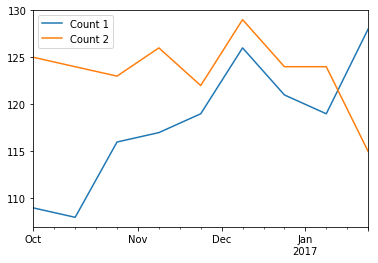

In [178]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()